<h1><center>Prodigy InfoTech</center></h1>
<h2><Center>TASK 3</Center></h2>
<h3><center>Submitted by: Ghaayathri Devi K</center></h3>
Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [1]:
# General steps
# 1. Import the required libraries
# 2. Load the image and convert it to dataframe
# 3. Seperate input feature and targets
# 4. Split train and test values
# 5. Build and train model
# 6. Model evaluation
# 7. Prediction

In [2]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Load the images and convert to dataframe

categories = ['cat', 'dog']
flat_data_arr = [] # input array
target_arr = [] # output array

data_dir = 'images/'

In [4]:
# path that has all categories of images

for i in categories:
    print(f'loading... category : {i}')
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded... category : {i} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category : cat
loaded... category : cat successfully
loading... category : dog
loaded... category : dog successfully


In [5]:
#dataframe 
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(500, 67501)

In [6]:
#input data  
x=df.iloc[:,:-1]  
#output data 
y=df.iloc[:,-1]

In [7]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [8]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['rbf','poly']} 
  
# Creating a support vector classifier 
svc=svm.SVC(probability=True) 
  
# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

In [9]:
# Training the model using the training data 
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [10]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 68.0% accurate


In [11]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


              precision    recall  f1-score   support

         cat       0.66      0.76      0.70        50
         dog       0.71      0.60      0.65        50

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



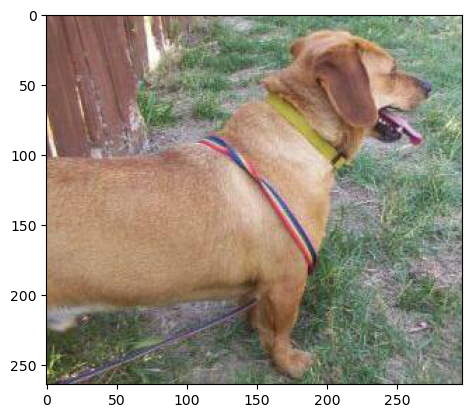

cat = 46.103442647060085%
dog = 53.896557352939936%
The predicted image is : dog


In [19]:
path='test_images/test_1.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[model.predict(l)[0]])

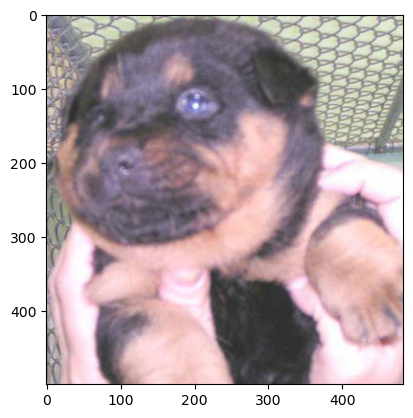

cat = 41.76698435742451%
dog = 58.233015642575495%
The predicted image is : dog


In [16]:
path='test_images/test_2.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[model.predict(l)[0]])

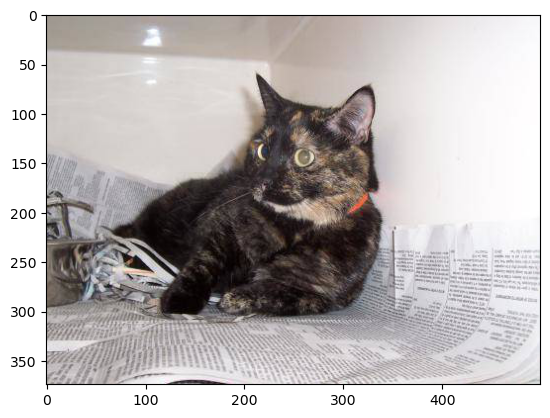

cat = 55.32378713322992%
dog = 44.67621286677008%
The predicted image is : cat


In [17]:
path='test_images/test_3.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[model.predict(l)[0]])

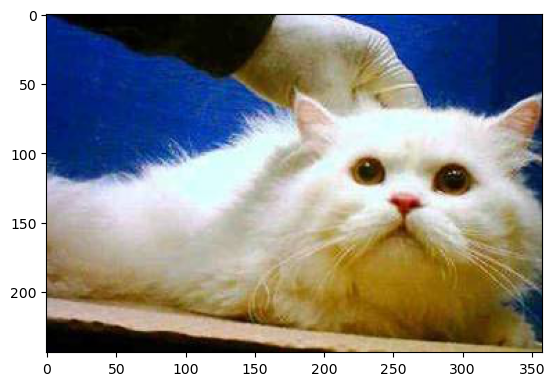

cat = 53.5889877268966%
dog = 46.411012273103395%
The predicted image is : cat


In [18]:
path='test_images/test_4.jpg'
img=imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[model.predict(l)[0]])